# Análise do setor de marketing de uma empresa X

Essa análise tem o objetivo de demonstrar as relações entre os investimentos de marketing em três meios de comunicação (Youtube, Facebook e Jornal) e seu redimento, iremos observar se a empresa está tendo retornos lucrativos e quais os melhores investimentos.<br>
No final desta análise treinaremos um modelo de Regressão para identificar os possíveis retornos para diferentes variáveis de investimento.

# Importando o Dataset

Para essa análise será utilizado um dataset em formato csv, de nome MKT disponibilisado no desafio 4 do Curso de Data Science da Escola DNC.

In [1]:
# Importando a biblioteca pandas
import pandas as pd

In [2]:
# Lendo o arquivo CSV
df = pd.read_csv('MKT.csv', delimiter=',')

# Análise Descritiva

In [3]:
# Visualizando o dataset
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [4]:
# Criando nova coluna do total investido
df['total_investment'] = df['youtube'] + df['facebook'] + df['newspaper']

In [5]:
# Verificando as informações das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   youtube           171 non-null    float64
 1   facebook          171 non-null    float64
 2   newspaper         171 non-null    float64
 3   sales             171 non-null    float64
 4   total_investment  171 non-null    float64
dtypes: float64(5)
memory usage: 6.8 KB


In [6]:
# utilizando as informações estatisticas das colunas númericas
df.describe()

,youtube,facebook,newspaper,sales,total_investment
count,171.000000,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807,240.932632
std,102.449597,17.913532,24.902918,6.314608,112.167551
min,0.840000,0.000000,0.360000,1.920000,25.680000
25%,91.080000,11.700000,13.740000,12.540000,146.820000
50%,179.760000,26.760000,31.080000,15.480000,248.400000
75%,262.980000,43.680000,50.880000,20.820000,337.740000
max,355.680000,59.520000,121.080000,32.400000,520.320000


In [7]:
# Observando a correlação entre os dados
df.corr()

,youtube,facebook,newspaper,sales,total_investment
youtube,1.000000,0.086538,0.110759,0.782030,0.951773
facebook,0.086538,1.000000,0.293425,0.602918,0.303889
newspaper,0.110759,0.293425,1.000000,0.254987,0.370040
sales,0.782030,0.602918,0.254987,1.000000,0.867176
total_investment,0.951773,0.303889,0.370040,0.867176,1.000000


Considerando as correlações baixas se menores que 0.6:<br>
Percebemos que os dados da coluna 'facebook' tem uma maior correlação com a coluna 'sales' e uma menor correlação com a coluna 'total_investment'.<br>
Além disso a correlação de 'newspaper' com 'sales' é baixa.

Ao olhar somente estes dados inicialmente proponho que a empresa devria aumentar seus investimentos na plataforma do facebook, e diminuir no youtube.<br>
Os investimentos no jornal, parecem estar se tornando irrelevantes em consideração aos ganhos, dessa forma poderiam ser eliminados para diminuir os gastos da empresa neste setor.

# Análise Exploratória

Para visualização dos dados será utilizado a biblioteca Seaborn e Matplotlib.

Seaborn: https://seaborn.pydata.org/tutorial.html<br>
Matplotlib: https://matplotlib.org/stable/users/index.html

In [8]:
# Importando a biblioteca seaborn, a biblioteca numpy e o submodulo pyplot da biblioteca matplotlib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

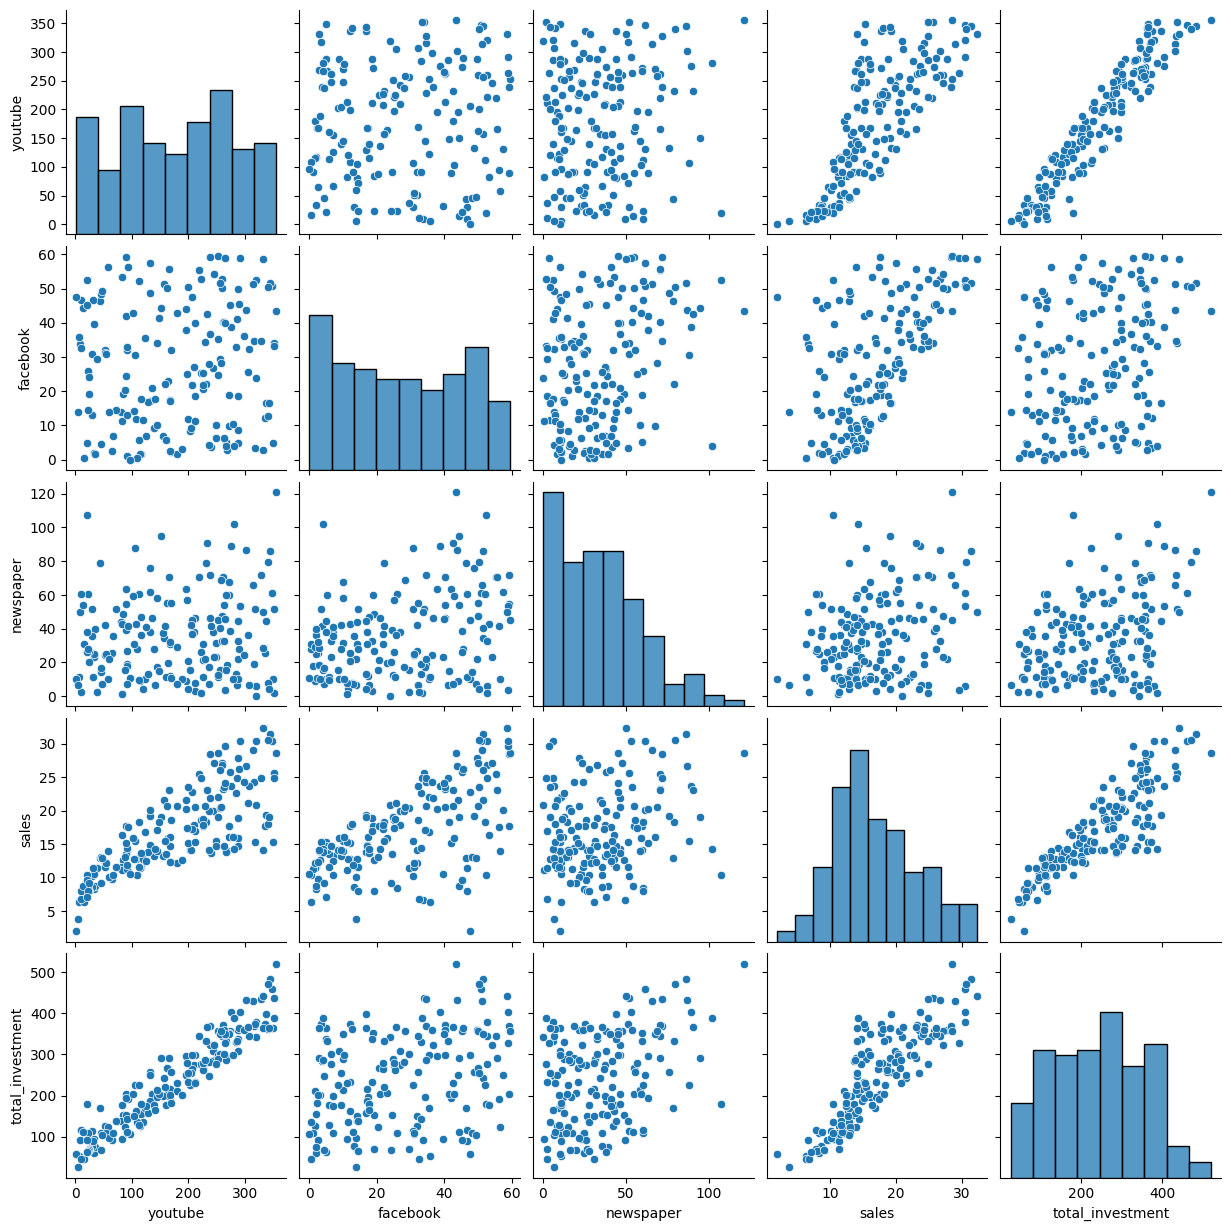

In [9]:
# Visualizando a correlação entre os dados
sns.pairplot(df)

Podemos perceber uma grande disperção entre os dados, exceto entre 'total_investment' e 'youtube', e entre 'sales' e 'total_investment'.

<Axes: >

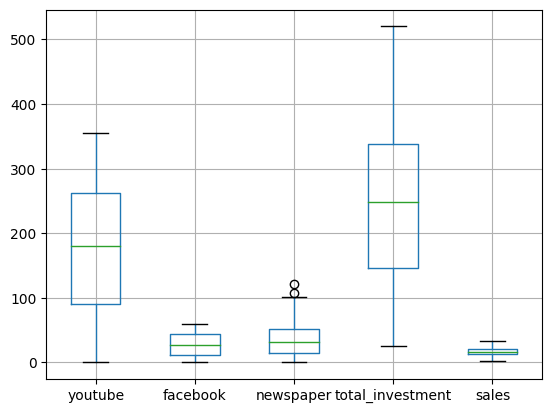

In [10]:
# Visualizando gráfico boxplot
df.boxplot(column=['youtube', 'facebook', 'newspaper', 'total_investment', 'sales'])

### Tratando os outilers

Para continuar a análise os outilers serão alterados para o limite.<br>
Os outilers serão determinados de acordo com o método de Tukey.

In [11]:
# Definindo o Q1 e o Q3
Q3 = df['newspaper'].quantile(0.75)
Q1 = df['newspaper'].quantile(0.25)

In [12]:
# Calculando o interquartil
IQR = Q3 - Q1

In [13]:
# Calculando o limite superior e inferior
limIn = Q1 - (IQR * 1.5)
limSp = Q3 + (IQR * 1.5)

In [14]:
# Retirando os outilers do DataFrame
df.query(f'(newspaper >= {limIn}) and (newspaper <= {limSp})', inplace=True)

In [15]:
# Revisando novamente as correlações
df.corr()

,youtube,facebook,newspaper,sales,total_investment
youtube,1.000000,0.092200,0.110262,0.776382,0.954857
facebook,0.092200,1.000000,0.270263,0.614581,0.303433
newspaper,0.110262,0.270263,1.000000,0.253835,0.357040
sales,0.776382,0.614581,0.253835,1.000000,0.864771
total_investment,0.954857,0.303433,0.357040,0.864771,1.000000


<Axes: >

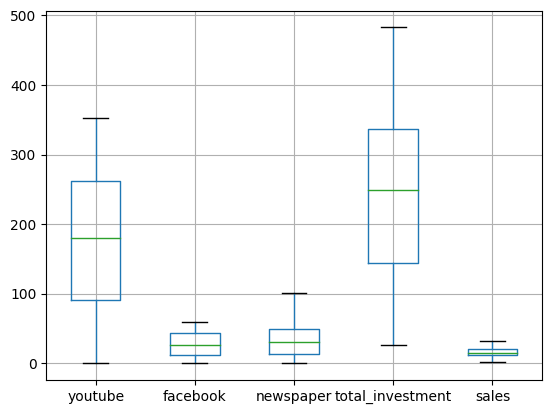

In [16]:
# Visualizando gráfico boxplot
df.boxplot(column=['youtube', 'facebook', 'newspaper', 'total_investment', 'sales'])

In [17]:
# Armazenando o total individual de cada investimento e do retorno
youtube_total = df['youtube'].sum()
facebook_total = df['facebook'].sum()
newspaper_total = df['newspaper'].sum()
sales_total = df['sales'].sum()
total = df['total_investment'].sum()

In [18]:
# Organizando os dados para o gráfico
height = [float(youtube_total), float(facebook_total), float(newspaper_total), float(sales_total), float(total)]
bars = ('youtube', 'facebook', 'newspaper', 'sales', 'total_investment')
y_pos = np.arange(len(bars))

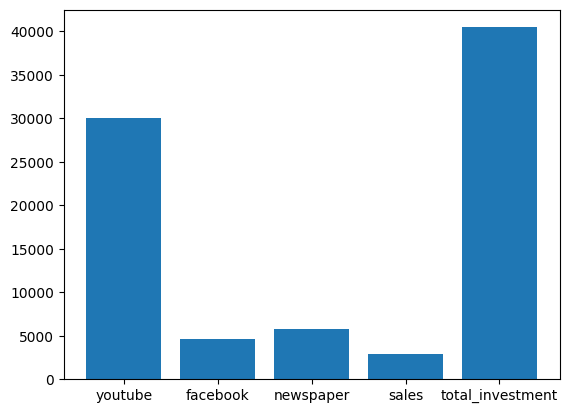

In [19]:
# Visualizando gráico de barras com os investimentos e o rendimento
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.show()

O gráfico nos mostra que os investimentos tem ultrapassado e muito o retorno, assim vemos que não está existindo um lucro para a empresa.

# Modelagem

Nesta etapa utilizarei a funções LinearRegression e DecisionTreeRegressor da biblioteca Scikit-Learn, e a função XGBRegressor da biblioteca XGBoost para predizer os dados de 'sales' a partir das variaveis dos investimentos, a métrica que será utilizada para determinar qual o melhor modelo será o RMSE.

LinearRegression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression<br>
DecisionTreeRegressor: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor<br>
XGBRegressor: https://xgboost.readthedocs.io/en/stable/python/python_api.html

In [20]:
# Importando a biblioteca sklearn e a biblioteca XGBoost
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [21]:
# Separando a data X e o target y
X = df[['youtube', 'facebook', 'newspaper']]
y = df['sales']

In [22]:
# Separando massa de treino e massa de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=50)

In [23]:
# Preparandoo 1º modelo com LinearRegression
linearModel = LinearRegression()

In [24]:
# Treinando o 1º modelo
linearTrained = linearModel.fit(X_train, y_train)

In [25]:
# Testando o 1º modelo
linearPredict = linearTrained.predict(X_test)

In [26]:
# RMSE do modelo com LinearRegression
linearMSE = mean_squared_error(y_test, linearPredict)
float(np.sqrt(linearMSE))

1.8316085212241064

In [27]:
# Preparando o 2º modelo com DecisionTreeRegressor
treeModel = DecisionTreeRegressor()

In [28]:
# Treinando o 2º modelo
treeTrained = treeModel.fit(X_train, y_train)

In [29]:
# Testando o 2º modelo
treePredict = treeTrained.predict(X_test)

In [30]:
# RMSE do modelo com DecisionTreeRegressor
treeMSE = mean_squared_error(y_test, treePredict)
float(np.sqrt(treeMSE))

1.227453404600401

In [31]:
# Preparando o 3º modelo com XGBRegressor
xgbModel = XGBRegressor()

In [32]:
# Treinando o 3º modelo
xgbTrained = xgbModel.fit(X_train, y_train)

In [33]:
# Testando o 3º modelo
xgbPredicit = xgbTrained.predict(X_test)

In [34]:
# RMSE do modelo com XGBRegressor
xgbMSE = mean_squared_error(y_test, xgbPredicit)
float(np.sqrt(xgbMSE))

0.8776788130678602

O modelo escolhido foi o 3º modelo pois seu RMSE é melhor sendo menor que os outros dois, tendo o valor de 0.8776788130678602.<br>
Iremos utilizar o GridSearchCV para otimizar os hiperparametros do modelo.

GridSearchCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [35]:
# Verificando alguns parametros do modelo
xgbTrained.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [36]:
# Definindo algumas possibilidades de parametros
parameters = {
    'colsample_bytree': [0, 1],
    'gamma': [0, 1, 2],
    'max_delta_step': [0, 1, 2],
    'max_depth': [5, 6, 7],
    'min_child_weight': [0, 1],
    'n_jobs': [5],
    'subsample': [0, 1],
}

In [37]:
# Repreparando o modelo do XGBRegressor() utilizando GridSearchCV
xgbGrid = GridSearchCV(XGBRegressor(), parameters, refit='neg_mean_squared_error', verbose=True)

In [38]:
# Verificação e treinamento do modelo com os melhores parâmetros
xgbGridModel = xgbGrid.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [39]:
# Observando os melhores parametros
xgbGridModel.best_params_

{'colsample_bytree': 1,
 'gamma': 1,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 0,
 'n_jobs': 5,
 'subsample': 1}

In [40]:
# Testando o modelo melhorado
yGrid = xgbGridModel.predict(X_test)

In [41]:
# O RMSE do modelo melhorado
gridMSE = mean_squared_error(y_test, yGrid)
float(np.sqrt(gridMSE))

0.8393664060212284

Agora que o modelo está parametrizado faremos algumas predições.<br>
Utilizarei um for para combinar valores de 0 a 27 dentro do modelo, e verificar qual a melhor proporção de investimentos nas plataformas, range com base na menor das médias.

In [42]:
df.describe()

,youtube,facebook,newspaper,sales,total_investment
count,169.000000,169.000000,169.000000,169.000000,169.000000
mean,177.903195,27.431006,34.305799,16.892308,239.640000
std,101.414376,17.874627,23.492735,6.268315,110.647786
min,0.840000,0.000000,0.360000,1.920000,25.680000
25%,91.560000,11.520000,13.200000,12.600000,143.760000
50%,179.760000,26.040000,30.720000,15.480000,248.400000
75%,262.200000,42.960000,49.680000,20.760000,336.960000
max,352.320000,59.520000,101.760000,32.400000,482.880000


In [43]:
# Definindo uma variavel para receber o melhor valor
best_return = 0
best_invest = []

In [44]:
# Verificando varias combinações para prever os melhores investimentos
for youtube in range(0, 28):
    for newspaper in range(0, 28):
        for facebook in range(0, 28):
            data_test = [[youtube, facebook, newspaper]]
            sales = float(xgbGridModel.predict(data_test)[0])

            if sales > best_return:
                best_return = sales
                best_invest.append(data_test[0])

In [45]:
# A média dos investimentos e os invesstimentos do maior retorno verificado
print(pd.DataFrame(best_invest, columns=[['youtube', 'facebook', 'newspaper']]).mean())
print(best_invest[-1])

youtube      14.227273
facebook     12.454545
newspaper     0.000000
dtype: float64
[24, 27, 0]


Diferente da hipótese inicial percebemos que o melhor investimento é o Youtube, mas o investivento no Facebook tem um crescimento rapido no retorno.<br>
O melhor cénario para essa empresa seria colocar os maiores investimentos no Youtube, mas aumentar os investimentos no facebook tambem.<br>
O investimento no jornal não tem grande retorno, dessa forma seus investimentos deveriam ser redirecionados para as outras plataformas.